# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
# transform = transforms.Compose([transforms.ToTensor(),
#                                 transforms.Normalize((0.5,), (0.5,))])
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5, 0.5)])
# Download and load the training data
trainloader = torch.utils.data.DataLoader(
                                        datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
                                        , batch_size=64, shuffle=True)
# Download and load the test data
testloader = torch.utils.data.DataLoader(
                                        datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
                                        , batch_size=1, shuffle=True)

Here we can see one of the images.

<Axes: >

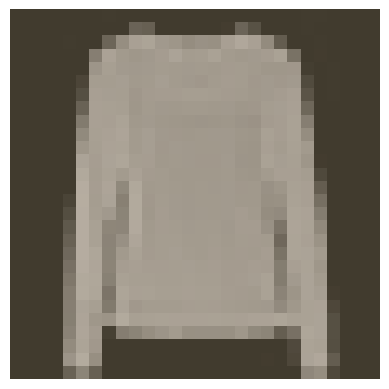

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:])

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [2]:
# TODO: Define your network architecture here
from torch import nn, optim

model = nn.Sequential(nn.Linear(in_features = 784, out_features = 256), 
                nn.ReLU(),
                nn.Linear(in_features = 256, out_features = 128),
                nn.ReLU(),
                nn.Linear(in_features = 128, out_features = 10),
                nn.LogSoftmax(dim = 1))

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [36]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

In [37]:
# TODO: Train the network here
ecophs = 5
losses= [[] for _ in range(ecophs)]

for ecoph_id in range(ecophs):
    running_loss = 0
    print(f"Start {ecoph_id=}:")
    for iter_id, mini_batch in enumerate(trainloader):
        optimizer.zero_grad()
        
        images, labels = mini_batch
        images = images.view(images.shape[0], -1)

        logit = model(images)
        loss = criterion(logit, labels)
        loss.backward()
        optimizer.step()

        running_loss+=loss.item()
        losses[ecoph_id].append(loss.item())
        if iter_id%300 == 0 and iter_id:
            print(f"\titer {iter_id} done, loss: {running_loss/iter_id : .4f}")
    print(f"\tDone {ecoph_id=} , loss: {running_loss/len(trainloader) :.4f}")



Start ecoph_id=0:
	iter 300 done, loss:  0.7820
	iter 600 done, loss:  0.6387
	iter 900 done, loss:  0.5894
	Done ecoph_id=0 , loss: 0.5842
Start ecoph_id=1:
	iter 300 done, loss:  0.4593
	iter 600 done, loss:  0.4459
	iter 900 done, loss:  0.4478
	Done ecoph_id=1 , loss: 0.4470
Start ecoph_id=2:
	iter 300 done, loss:  0.4261
	iter 600 done, loss:  0.4258
	iter 900 done, loss:  0.4330
	Done ecoph_id=2 , loss: 0.4320
Start ecoph_id=3:
	iter 300 done, loss:  0.4097
	iter 600 done, loss:  0.4115
	iter 900 done, loss:  0.4131
	Done ecoph_id=3 , loss: 0.4120
Start ecoph_id=4:
	iter 300 done, loss:  0.3900
	iter 600 done, loss:  0.3984
	iter 900 done, loss:  0.3995
	Done ecoph_id=4 , loss: 0.3990


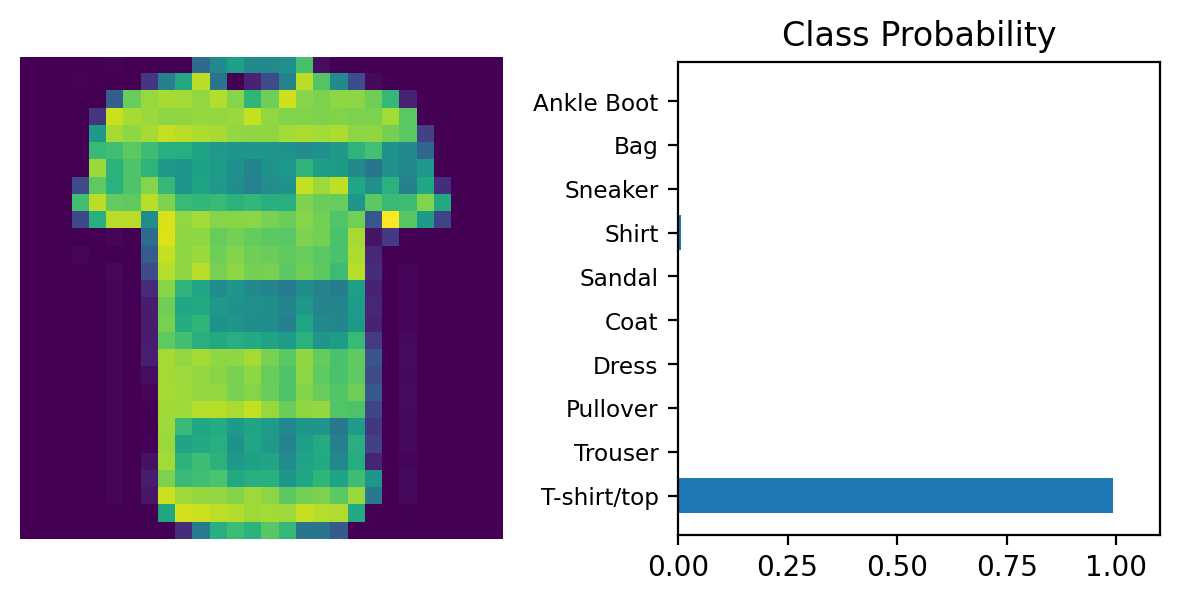

In [32]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# Convert 2D image to 1D vector
img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

In [12]:
nameoflabel = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

In [29]:
from importlib import reload
reload(helper)

<module 'helper' from 'c:\\Users\\kit97\\Documents\\GitHub\\deep-learning-v2-pytorch\\intro-to-pytorch\\helper.py'>

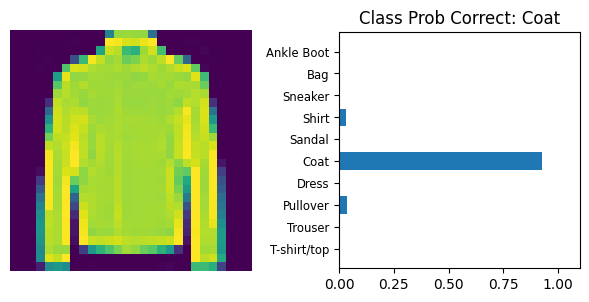

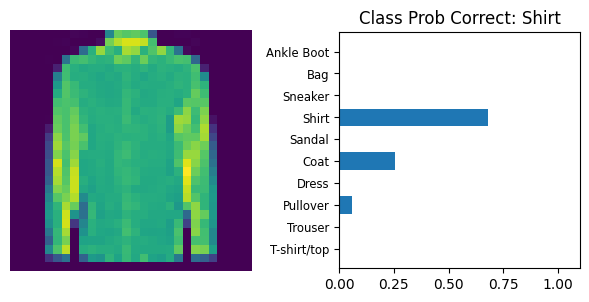

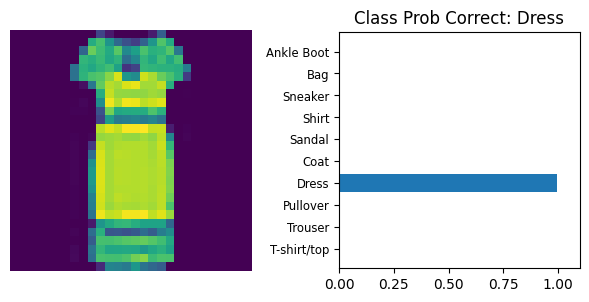

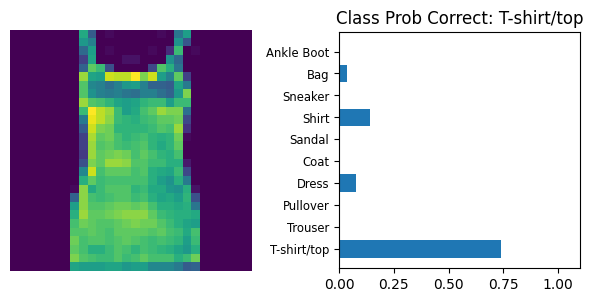

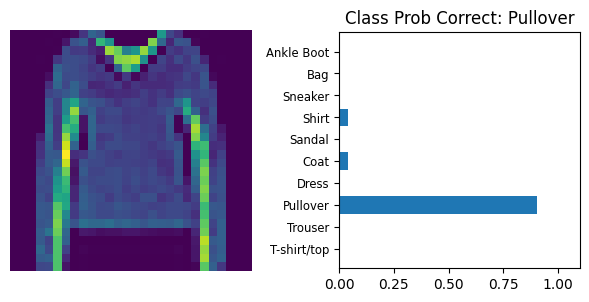

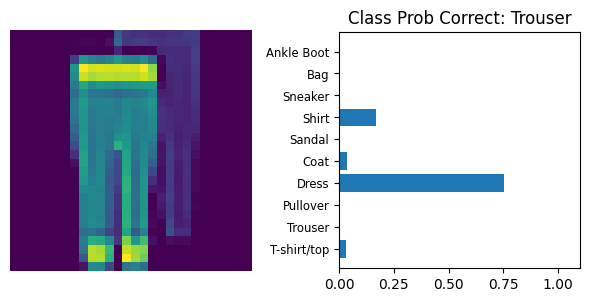

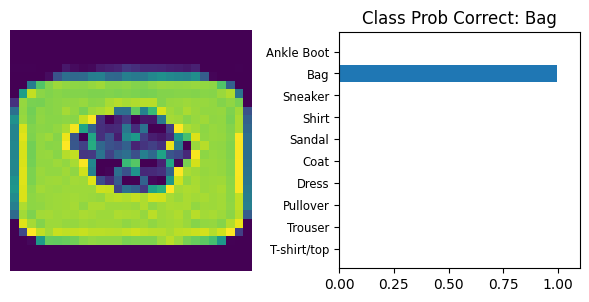

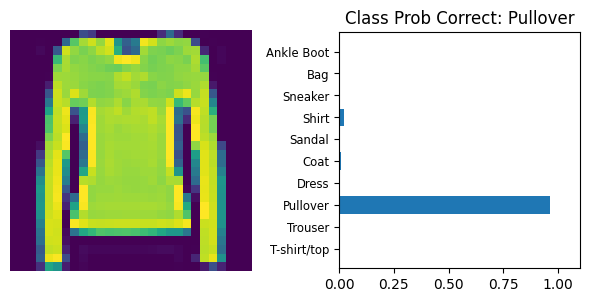

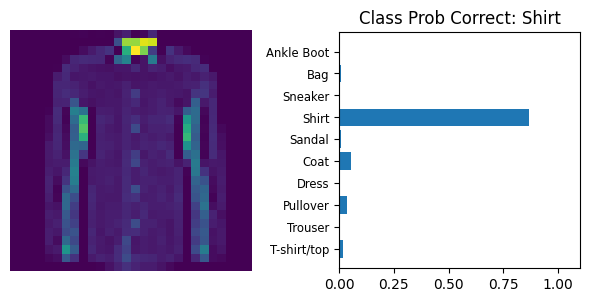

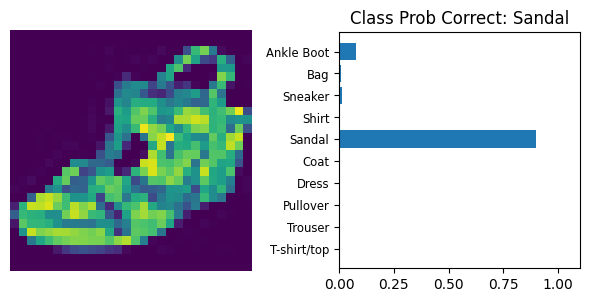

In [30]:
data_loader = iter(testloader)
for _ in range(10):
    image, label = next(data_loader)
    input = image.view(1, -1)
    with torch.no_grad():
        ps = torch.exp(model(input))
    helper.view_classify(image, ps, version='Fashion', label = nameoflabel[label.item()])

In [38]:
correct = 0
wrong = 0
for image, label in testloader:
    input = image.view(1, -1)
    with torch.no_grad():
        ps = torch.exp(model(input))
        perdicted = torch.argmax(ps)
    if perdicted == label:
        correct += 1
    else:
        wrong += 1
        # helper.view_classify(image, ps, version='Fashion', label = nameoflabel[label.item()])
        # if wrong > 20: 
        #     break
print(correct/(correct+wrong) *100)

84.87
